**Feed-forward Neural Network**

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [3]:
# calling to (0,1) range    #This part of the code is performing
# feature scaling, specifically min-max normalization, on the training and validation datasets.

# Min-max normalization scales the data to a fixed range, typically (0, 1),
max_val = train_df.max(axis= 0) #calculates the maximum value for each column
min_val = train_df.min(axis= 0) #calculates the minimum value for each column (feature)

range = max_val - min_val
train_df = (train_df - min_val)/(range)  #This line normalizes the training data (train_df)

val_df =  (val_df- min_val)/range  # This line normalizes the validation data (val_df) in the same way as the training data

In [4]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]] #useful when defining the input layer of a neural network model,

input_shape # number of features in the training data.

[11]

In [5]:
# function creates a sequential model, which is a linear stack of layers.
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu', #‘relu’ activation function in the hidden layers.
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam', # Adaptive Moment Estimation

			loss='mae') #absolute differences between the predicted and actual values.
                   #loss function

In [8]:
losses = model.fit(X_train, y_train, #We’ll use the fit method to train our model.

				validation_data=(X_val, y_val),


				batch_size=256,
				epochs=15, # total epoch

				)

Epoch 1/15
5/5 [==============================] - 1s 51ms/step - loss: 0.3954 - val_loss: 0.2385
Epoch 2/15
5/5 [==============================] - 0s 15ms/step - loss: 0.1752 - val_loss: 0.1301
Epoch 3/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1495 - val_loss: 0.1637
Epoch 4/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1569 - val_loss: 0.1319
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1277 - val_loss: 0.1239
Epoch 6/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1270 - val_loss: 0.1271
Epoch 7/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1252 - val_loss: 0.1170
Epoch 8/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1160 - val_loss: 0.1142
Epoch 9/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1138 - val_loss: 0.1125
Epoch 10/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1102 - val_loss: 0.1082
Epoch 11/15
5/5 [================

In [9]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :]) #selects the first three rows of the validation features.


1/1 [==============================] - 0s 83ms/step


array([[0.41302413],
       [0.52236015],
       [0.39968956]], dtype=float32)

In [10]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

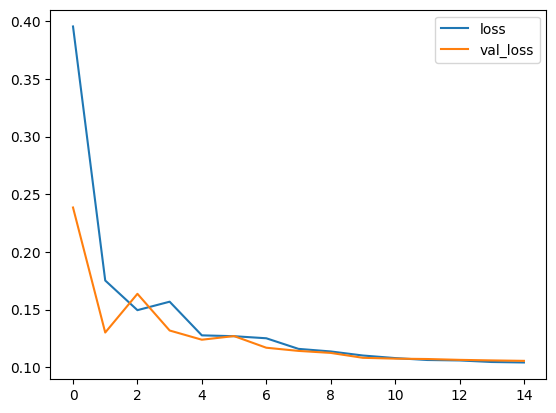

In [11]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()